In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
style.use("seaborn")

In [3]:
forecasts = pd.read_csv("Forecasts_Regression.csv", index_col = 0)

In [4]:
forecasts

,TV_Pazar
2020-01-01,465914.117310
2020-02-01,380856.335835
2020-03-01,319687.582562
2020-04-01,312751.372389
2020-05-01,398606.391908
2020-06-01,437813.955073
2020-07-01,302115.320188
2020-08-01,366922.467296
2020-09-01,440639.211554
2020-10-01,470502.004911


In [5]:
target = pd.read_csv("Target.csv", index_col = 0)

In [6]:
target

,TV_Pazar
date,
2013-01-01,571770.0
2013-02-01,488879.0
2013-03-01,488910.0
2013-04-01,474507.0
2013-05-01,468524.0
...,...
2019-11-01,546334.0
2019-12-01,504745.0
2020-01-01,432595.0


In [7]:
target_l3 = target[-3:]

In [8]:
target_l3

,TV_Pazar
date,
2020-01-01,432595.0
2020-02-01,412781.0
2020-03-01,383645.0


In [9]:
forecasts_f3 = forecasts[:3]

In [10]:
forecasts_f3 

,TV_Pazar
2020-01-01,465914.117310
2020-02-01,380856.335835
2020-03-01,319687.582562


In [11]:
forecasts_f3.columns = ["TV_Forecasts"]

In [12]:
forecasts_f3.merge(target_l3, on = forecasts_f3.index)

,key_0,TV_Forecasts,TV_Pazar
0,2020-01-01,465914.117310,432595.0
1,2020-02-01,380856.335835,412781.0
2,2020-03-01,319687.582562,383645.0


In [13]:
df = forecasts_f3.merge(target_l3, on = forecasts_f3.index).set_index("key_0")

In [14]:
df

,TV_Forecasts,TV_Pazar
key_0,,
2020-01-01,465914.117310,432595.0
2020-02-01,380856.335835,412781.0
2020-03-01,319687.582562,383645.0


In [15]:
df["TV_Forecasts"] = df["TV_Forecasts"].apply(round)

In [16]:
df

,TV_Forecasts,TV_Pazar
key_0,,
2020-01-01,465914,432595.0
2020-02-01,380856,412781.0
2020-03-01,319688,383645.0


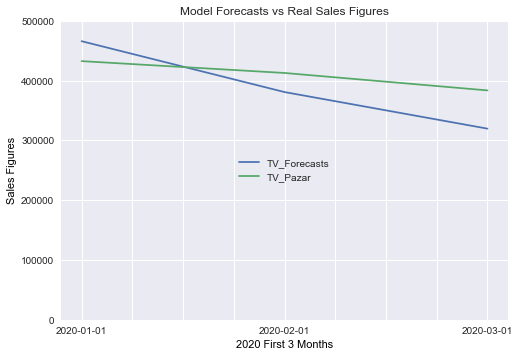

In [17]:
df.plot.line()
plt.title("Model Forecasts vs Real Sales Figures")
plt.xlabel("2020 First 3 Months", color = "k")
plt.ylabel("Sales Figures", color = "k")
plt.ylim(0,500000)
plt.legend(loc = "center")